In [1]:
import pandas as pd

In [24]:
eda = pd.read_excel('globalterrorismdb.xlsx')

In [25]:
eda.shape

(181691, 135)

In [26]:
eda.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [27]:
eda.approxdate.isna().sum()

172452

In [28]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [31]:
# Dropping columns with high number of NaN
for col in eda.columns:
    if eda[col].isna().sum() > 5000:
        eda.drop(col, axis = 1, inplace = True)

In [32]:
eda.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'target1', 'natlty1',
       'natlty1_txt', 'gname', 'guncertain1', 'individual', 'weaptype1',
       'weaptype1_txt', 'property', 'ishostkid', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [40]:
eda.head(2)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,individual,weaptype1,weaptype1_txt,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,0,13,Unknown,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,0,13,Unknown,0,0.0,PGIS,-9,-9,1,1


In [35]:
eda.isna().sum()

eventid               0
iyear                 0
imonth                0
iday                  0
extended              0
country               0
country_txt           0
region                0
region_txt            0
provstate           421
city                434
latitude           4556
longitude          4557
specificity           6
vicinity              0
crit1                 0
crit2                 0
crit3                 0
doubtterr             1
multiple              1
success               0
suicide               0
attacktype1           0
attacktype1_txt       0
targtype1             0
targtype1_txt         0
target1             636
natlty1            1559
natlty1_txt        1559
gname                 0
guncertain1         380
individual            0
weaptype1             0
weaptype1_txt         0
property              0
ishostkid           178
dbsource              0
INT_LOG               0
INT_IDEO              0
INT_MISC              0
INT_ANY               0
dtype: int64

In [37]:
eda.dropna(inplace = True)

In [38]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173732 entries, 1 to 181690
Data columns (total 41 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          173732 non-null  int64  
 1   iyear            173732 non-null  int64  
 2   imonth           173732 non-null  int64  
 3   iday             173732 non-null  int64  
 4   extended         173732 non-null  int64  
 5   country          173732 non-null  int64  
 6   country_txt      173732 non-null  object 
 7   region           173732 non-null  int64  
 8   region_txt       173732 non-null  object 
 9   provstate        173732 non-null  object 
 10  city             173732 non-null  object 
 11  latitude         173732 non-null  float64
 12  longitude        173732 non-null  float64
 13  specificity      173732 non-null  float64
 14  vicinity         173732 non-null  int64  
 15  crit1            173732 non-null  int64  
 16  crit2            173732 non-null  int6

In [43]:
categorical_data =eda.select_dtypes('object')
numerical_data = eda.select_dtypes('number')

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173732 entries, 1 to 181690
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   country_txt      173732 non-null  object
 1   region_txt       173732 non-null  object
 2   provstate        173732 non-null  object
 3   city             173732 non-null  object
 4   attacktype1_txt  173732 non-null  object
 5   targtype1_txt    173732 non-null  object
 6   target1          173732 non-null  object
 7   natlty1_txt      173732 non-null  object
 8   gname            173732 non-null  object
 9   weaptype1_txt    173732 non-null  object
 10  dbsource         173732 non-null  object
dtypes: object(11)
memory usage: 15.9+ MB


In [46]:
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173732 entries, 1 to 181690
Data columns (total 30 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   eventid      173732 non-null  int64  
 1   iyear        173732 non-null  int64  
 2   imonth       173732 non-null  int64  
 3   iday         173732 non-null  int64  
 4   extended     173732 non-null  int64  
 5   country      173732 non-null  int64  
 6   region       173732 non-null  int64  
 7   latitude     173732 non-null  float64
 8   longitude    173732 non-null  float64
 9   specificity  173732 non-null  float64
 10  vicinity     173732 non-null  int64  
 11  crit1        173732 non-null  int64  
 12  crit2        173732 non-null  int64  
 13  crit3        173732 non-null  int64  
 14  doubtterr    173732 non-null  float64
 15  multiple     173732 non-null  float64
 16  success      173732 non-null  int64  
 17  suicide      173732 non-null  int64  
 18  attacktype1  173732 non-

In [47]:
import datetime as dt

In [51]:
len(categorical_data['city'].unique())

34541

In [52]:
categorical_data['weaptype1_txt'].uniqueque()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

In [54]:
weapontyp_1 = categorical_data['weaptype1_txt'].value_counts()[0]

In [58]:
weapontyp_1_val = categorical_data['weaptype1_txt'].value_counts()

In [62]:
weapontyp_1_val['Vehicle'] = weapontyp_1_val['Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)']

In [63]:
weapontyp_1_val.drop('Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', axis = 1)

ValueError: No axis named 1 for object type Series

<AxesSubplot:ylabel='Frequency'>

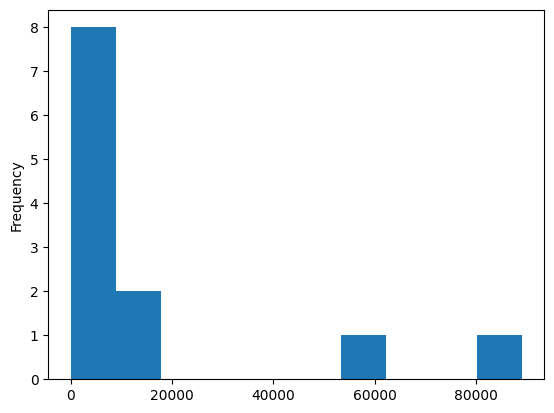

In [60]:
weapontyp_1_val.plot(kind = 'hist')

In [56]:
sns.displot(x=weapontyp_1_val, y=weapontyp_1, hue=weapontyp_1);

ValueError: If using all scalar values, you must pass an index